## データを見ていくよ！

その前に今回の背景とタスクを確認しておこう！

**〇背景**<br>
H＆M Groupは、53のオンライン市場と約4,850の店舗を持つブランドと企業のファミリーです。H＆M Groupのオンラインストアは買い物客に閲覧するための製品の幅広い選択を提供します。しかし、選択肢が多すぎると、顧客は自分が興味を持っているものや探しているものをすぐに見つけられず、最終的には購入できない可能性があります。ショッピング体験を向上させるには、製品の推奨事項が重要です。さらに重要なことに、顧客が正しい選択をするのを支援することは、収益を減らし、それによって輸送からの排出を最小限に抑えるため、持続可能性にもプラスの影響を及ぼします。
このコンペティションでは、H＆M Groupは、以前のトランザクションのデータ、および顧客と製品のメタデータに基づいて製品の推奨事項を作成することを勧めます。利用可能なメタデータは、衣服の種類や顧客の年齢などの単純なデータから、製品の説明からのテキストデータ、衣服の画像からの画像データにまで及びます。
どのような情報が役立つかについての先入観はありません。それはあなたが知るためのものです。カテゴリデータ型アルゴリズムを調査したい場合、またはNLPと画像処理の深層学習に飛び込みたい場合は、それはあなた次第です。

**〇タスク**<br>
ある顧客に対して12つの購入予測を行う。
→2020年9月22日以降の7日間で何を購入するのかを予測するよ。

In [ ]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt 
import cv2
from os import listdir
from IPython.display import Image
import glob

In [ ]:
data_path = '../input/h-and-m-personalized-fashion-recommendations/'

for filename in os.listdir(data_path):
    print(filename)

In [ ]:
for filename in os.listdir(data_path):
    if filename != 'images':
        df = pd.read_csv(data_path + filename)
        print(filename)
        print(len(df))
        display(df.head())

## No. 1 画像データ

In [ ]:
def getImagePaths():

    img_dir = '../input/h-and-m-personalized-fashion-recommendations/images/*/*.jpg'
    get_img = glob.glob(img_dir)
    image_names = []
    for filename in get_img:
        image_names.append(filename)
    
    return image_names


def display_multiple_img(images_paths, rows, cols):
    
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8) )
    for ind,image_path in enumerate(images_paths):
        image=cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        try:
            ax.ravel()[ind].imshow(image)
            ax.ravel()[ind].set_axis_off()
            ax.ravel()[ind].set_title(image_path[60:])
        except:
            continue;
    plt.tight_layout()
    plt.show()

In [ ]:
images_path = getImagePaths()
display_multiple_img(images_path[0:30], rows=6, cols=5)

## No. 2 transactions_train.csv

t_dat:購入日付<br>
customer_id:顧客の一意なid<br>
article_id:各物品の一意なid<br>
price:価格<br>
sales_cannel_id:1 or 2 （なんだこりゃ）<br>


In [ ]:
tst_path = '../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv'
tst = pd.read_csv(tst_path)
display(tst.head())
print(tst['customer_id'].nunique())

### 2-1. t_datの期間は？

In [ ]:
print(min(tst['t_dat']))
print(max(tst['t_dat']))

2年間のデータがあることがわかるね!

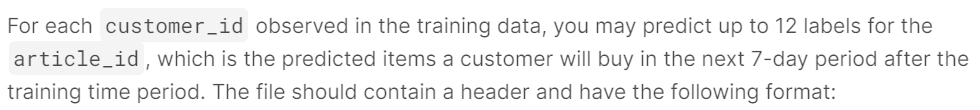

2020/9/22以降のデータを予測するよ

### 2-2. 顧客ごとの使用金額は？

In [ ]:
tst_price = tst[['customer_id', 'price']]
UU_price = tst_price.groupby('customer_id', as_index = False).sum()

display(UU_price.head())

nu = UU_price['customer_id'].nunique()

print(f'row_NotUU：{len(tst)}')
print(f'row_UU：{len(UU_price)}')
print(f'check: {nu}')

UU_price.describe()

金額の単位ってどうなってるのかな。

### 2-3. 人気商品は？

In [ ]:
pop_item_cnt = tst['article_id'].value_counts()
pop_item_cnt

# グラフ化重すぎぃぃぃぃぃ。
# pop_item = pd.DataFrame(pop_item_cnt)

# pop_item.plot.bar() # 棒グラフ

# 円グラフ
# sizes = pop_item['article_id']
# labels =  pop_item.index.tolist()
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
# ax1.axis('equal')
# plt.show()

In [ ]:
# 人気第1位
path = "../input/h-and-m-personalized-fashion-recommendations/images/070/0706016001.jpg"
im = plt.imread(path)
plt.figure(figsize=(15, 6))
plt.imshow(im)

In [ ]:
# 人気第２位
path = "../input/h-and-m-personalized-fashion-recommendations/images/070/0706016002.jpg"
im = plt.imread(path)
plt.figure(figsize=(15, 6))
plt.imshow(im)

In [ ]:
# 人気第３位
path = "../input/h-and-m-personalized-fashion-recommendations/images/037/0372860001.jpg"
im = plt.imread(path)
plt.figure(figsize=(15, 6))
plt.imshow(im)

In [ ]:
"""存在しない画像もあるよ。
path = "../input/h-and-m-personalized-fashion-recommendations/images/061/0610776002.jpg"
im = plt.imread(path)
plt.figure(figsize=(15, 6))
plt.imshow(im)
"""

###  2-4. sales_channel_idってなに！！

In [ ]:
# 年を表している？
sales_ch_cnt = tst['sales_channel_id'].value_counts()
sales_ch_cnt

display(sales_ch_cnt)

sales_ch = pd.DataFrame(sales_ch_cnt)

# 円グラフ
sizes = sales_ch['sales_channel_id']
labels =  sales_ch.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')
plt.show()

## No.3 article.csv

In [ ]:
article_dir = "../input/h-and-m-personalized-fashion-recommendations/articles.csv"
df_article = pd.read_csv(article_dir)
df_article.head()

### 3-1. アイテム数の数は？

In [ ]:
print(f'len(df_article)：{len(df_article)}')
articole_UU = df_article['article_id'].nunique()
print(f' UU数 {articole_UU}')

In [ ]:
df_article.info()

article_id: 一意のid<br>
product_code, prod_name: 各製品の一意なidと名称<br>
product_type, product_type_name: 製品をグループ化したものとその名称<br>
graphical_appearance_no, graphical_appearance_name: 画像のグループとその名前<br>
color_group_code, color_group_name: 色のグループとその名前<br>

### 3-2. どんな洋服が人気？

In [ ]:
product_group_name_cnts = df_article['product_group_name'].value_counts()

product_group_name_item = pd.DataFrame(product_group_name_cnts)

product_group_name_item.plot.bar() # 棒グラフ

In [ ]:
"""
garment upper body: 衣服上半身
garment lower body: 衣服下半身

"""

In [ ]:
product_group_name_cnts = df_article['product_type_name'].value_counts()

product_group_name_item = pd.DataFrame(product_group_name_cnts)

product_group_name_item = product_group_name_item[:15]

# 上位15件のみ表示
product_group_name_item.plot.barh() # 棒グラフ

In [ ]:
"""
thrusers : ズボン
dress : ドレス
sweater: セーター
"""

In [ ]:
colour_group_name_cnts = df_article['colour_group_name'].value_counts()

colour_group_name_item = pd.DataFrame(colour_group_name_cnts)

colour_group_name_item = colour_group_name_item[:15]

colour_group_name_item.plot.barh() # 棒グラフ

In [ ]:
"""
Black
Dark Blue
white
"""

In [ ]:
department_name_cnts = df_article['department_name'].value_counts().sort_values(ascending=False)

department_name_item = pd.DataFrame(department_name_cnts)

department_name_item = department_name_item[:20]

department_name_item.plot.barh() # 棒グラフ

In [ ]:
"""
Jersey:ジャージー（H&Mで人気のジャージー商品）
Knitwear: ニットウェア
Trouser:ズボン

"""

In [ ]:
index_name_cnts = df_article['index_name'].value_counts().sort_values(ascending=False)

index_name_item = pd.DataFrame(index_name_cnts)

index_name_item = index_name_item[:20]

index_name_item.plot.barh() # 棒グラフ

## No4. customers.csv

customer_id:各顧客の一意なid<br>
FN:0 or 1（不明）<br>
Active:0 or 1（不明）<br>
club_member_status:会員情報<br>
fashion_news_frequency:ニュースを送る頻度<br>
age:現在の年齢<br>
postal_code:郵便番号<br>

In [ ]:
costomers_dir = "../input/h-and-m-personalized-fashion-recommendations/customers.csv"
df_costomers = pd.read_csv(costomers_dir)
display(df_costomers.head())
print(f'顧客数: {len(df_costomers)}')

### 4-1. 年齢の分布は？

In [ ]:
ages=pd.DataFrame(df_costomers['age'].value_counts().sort_index())
labels = [ '{0} – {1}'.format(i, i + 5) for i in range(20, 70, 5) ]
c=pd.cut(ages.index,bins=np.arange(20, 75, 5),labels=labels)
h_ages=ages.groupby(c).sum()
h_ages

In [ ]:
h_ages.plot.bar() # 棒グラフ

20代と45~55歳のあたりにピークがあることがわかるね～

### 4-2. 会員情報の詳細は？

In [ ]:
df_costomers['club_member_status'].value_counts()

In [ ]:
club_member_status_cnts = df_costomers['club_member_status'].value_counts().sort_values(ascending=False)

club_member_status = pd.DataFrame(club_member_status_cnts)

club_member_status = club_member_status[:20]

club_member_status.plot.barh() # 棒グラフ

日本では、会員登録をしてから300Pを獲得するまではメンバー、それ以降はプラスメンバーになるみたい。<br>
ポイントは100円ごとに1Pたまるよ。<br>
海外では会員情報の制度も異なるみたいだね。<br>

### 4-3. ニュースを送る頻度は？

In [ ]:
df_costomers['fashion_news_frequency'].value_counts()

定期的（Regularly）にニュースを送ている顧客も今回与えられたデータの約35%くらいいるみたいだね。

In [ ]:
df_costomers['FN'].value_counts()

In [ ]:
df_costomers['Active'].value_counts()

FNとActiveは何を表しているのだろうか、、、。

## No.5 submission 

In [ ]:
submission_dir = "../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv"
df_submission = pd.read_csv(submission_dir)
display(df_submission.head())
print(len(df_submission))